#**SUPPORT VECTOR MACHINES**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [3]:
from google.colab import files
uploaded=files.upload()

Saving ex6data1.mat to ex6data1.mat


In [0]:
from scipy.io import loadmat
data=loadmat('ex6data1.mat')

In [0]:
x=data['X']
y=data['y']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

##**TRAINING THE MODEL**

In [7]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(x_train,y_train)
y_pred=svc_classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



##**F1-SCORE = 100%**

In [9]:
print(confusion_matrix(y_test,y_pred))

[[9 0]
 [0 4]]


##**VISUALISING THE MODEL**

(1.5, 5.0)

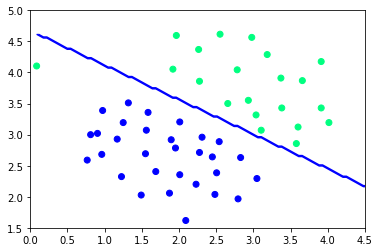

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=y,cmap='winter')

X1,X2 = np.meshgrid(np.linspace(x[:,0].min(),x[:,1].max(),num=100),np.linspace(x[:,1].min(),x[:,1].max(),num=100))
plt.contour(X1,X2,svc_classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

#**MODEL-2**

In [11]:
from google.colab import files
uploaded=files.upload()

Saving ex6data2.mat to ex6data2.mat


In [0]:
data2=loadmat('ex6data2.mat')

In [0]:
x2=data2['X']
y2=data2['y']

In [0]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,random_state=0)

In [15]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',degree=2,gamma=40)
classifier.fit(x_train2,y_train2)
y_pred2=classifier.predict(x_test2)
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       101
           1       0.97      0.99      0.98       115

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##**F1-SCORE = 98%**

In [16]:
print(confusion_matrix(y_test2,y_pred2))

[[ 98   3]
 [  1 114]]


##**VISUALISING DATASET**

LEARNING CURVE

In [0]:
from sklearn.model_selection import validation_curve
train_scores,test_scores=validation_curve(estimator=SVC(kernel='rbf'),X=x2,y=y2.ravel(),
                                          param_name='gamma',param_range=(10,50),cv=5,scoring='neg_mean_squared_error')
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='rbf'),x2, y2.ravel(),train_sizes=np.linspace(0.1,1.0,2),
                                                         cv=3,shuffle=True,random_state=0,scoring='neg_mean_squared_error')

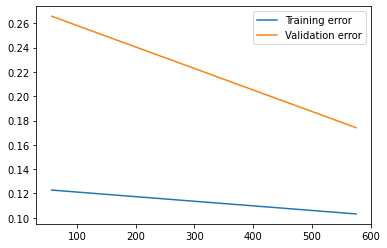

In [18]:
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()

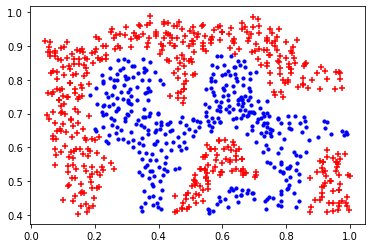

In [19]:
m=x2.shape[0]
pos2=(y2==1).reshape(m,1)
neg2=(y2==0).reshape(m,1)

plt.scatter(x2[pos2[:,0],0],x2[pos2[:,0],1],c="r",marker="+")
plt.scatter(x2[neg2[:,0],0],x2[neg2[:,0],1],c="b",s=10,marker="o")

(0.4, 1.0)

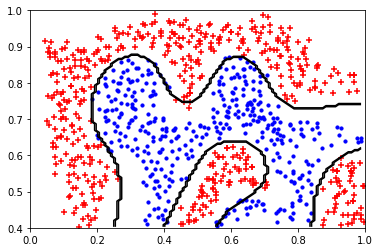

In [20]:
plt.scatter(x2[pos2[:,0],0],x2[pos2[:,0],1],c="r",marker="+")
plt.scatter(x2[neg2[:,0],0],x2[neg2[:,0],1],c="b",s=10,marker="o")

# plotting the decision boundary
X5,X6 = np.meshgrid(np.linspace(x2[:,0].min(),x2[:,1].max(),num=100),np.linspace(x2[:,1].min(),x2[:,1].max(),num=100))
plt.contour(X5,X6,classifier.predict(np.array([X5.ravel(),X6.ravel()]).T).reshape(X5.shape),1,colors="black")
plt.xlim(0,1)
plt.ylim(0.4,1)

#**MODEL-3**

In [21]:
from google.colab import files
uploaded=files.upload()

Saving ex6data3.mat to ex6data3.mat


In [0]:
data3=loadmat('ex6data3.mat')

In [0]:
x3=data3['X']
y3=data3['y']

In [0]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,random_state=0)

In [25]:
svc=SVC(kernel='rbf',gamma=10)
svc.fit(x_train3,y_train3)
y_pred3=svc.predict(x_test3)
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.94      0.97      0.95        31

    accuracy                           0.94        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##**F1-SCORE = 94%**

##**VISUALISING THE DATASET**

LEARNING CURVE

In [0]:
from sklearn.model_selection import learning_curve
train_sizes, train_score, valid_scores = learning_curve(SVC(kernel='rbf'),x3, y3.ravel(),train_sizes=np.linspace(0.1,1.0,2),
                                                        cv=5,shuffle=True,random_state=0,scoring='neg_mean_squared_error')
from sklearn.model_selection import validation_curve
train_scores,test_scores=validation_curve(estimator=SVC(kernel='rbf'),X=x3,y=y3.ravel(),
                                          param_name='gamma',param_range=(1,10),cv=5,scoring='neg_mean_squared_error')

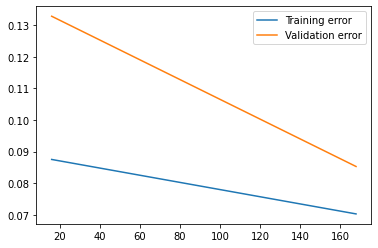

In [28]:
train_scores_mean = -train_score.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')
plt.legend()

In [0]:
a=x3.shape[0]
pos=(y3==1).reshape(a,1)
neg=(y3==0).reshape(a,1)

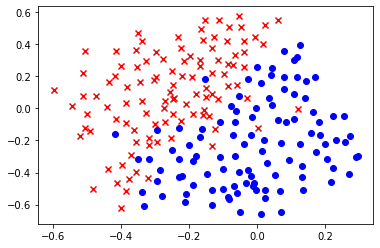

In [30]:
plt.scatter(x3[pos[:,0],0],x3[pos[:,0],1],color='red',marker='x')
plt.scatter(x3[neg[:,0],0],x3[neg[:,0],1],color='blue',marker='o')

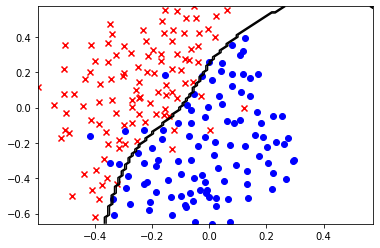

In [31]:
plt.scatter(x3[pos[:,0],0],x3[pos[:,0],1],color='red',marker='x')
plt.scatter(x3[neg[:,0],0],x3[neg[:,0],1],color='blue',marker='o')
X3,X4 = np.meshgrid(np.linspace(x3[:,0].min(),x3[:,1].max(),num=100),np.linspace(x3[:,1].min(),x3[:,1].max(),num=100))
plt.contour(X3,X4,svc.predict(np.array([X3.ravel(),X4.ravel()]).T).reshape(X3.shape),1,colors="black")